## **Perform evaluation**

Clusters found:  605


Text(0.5, 1.0, 'Initial cluster distribution')

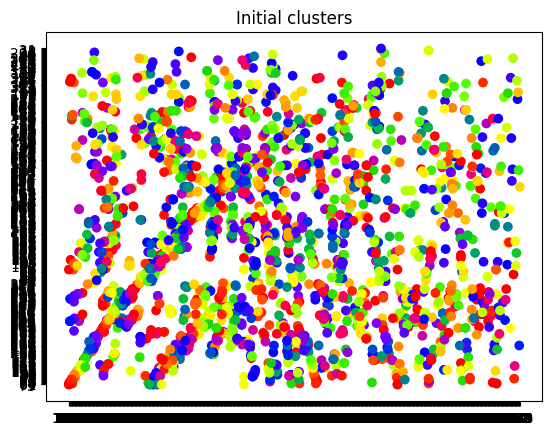

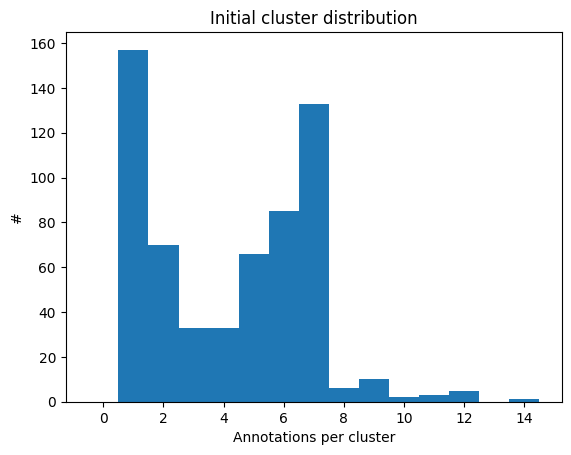

In [16]:
# Import necessary libraries
import csv
import math
import numpy as np
from numba import njit
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.ndimage import label as labelImage
from skimage.measure import find_contours
from scipy.ndimage import distance_transform_edt
from skimage.feature import peak_local_max

# Define function to compute Euclidean distance
def euclidean_distance(a, b):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(a, b)))

threshold = 4.5

# Read in ROI data
with open('/content/roidata.csv', 'r') as file:
    reader = csv.DictReader(file,fieldnames=['ROI_id', 'contour', 'centroid', 'Pos', 'Y', 'X'])
    roi_data = list(reader)

# Read in human-annotated data
with open('/content/Annotations_and_Clusters.csv', 'r') as file:
    reader = csv.DictReader(file)
    human_data = list(reader)



# Function to generate initial clusters using DBSCAN
def InitialClusterGeneration(xy, eps=0.02):
    # Standard Scale all data (0 mean, 1 std)
    xy = StandardScaler().fit_transform(xy)

    # Run DBSCAN for small, local clusters
    db = DBSCAN(eps=eps, leaf_size=1, min_samples=1).fit(xy)

    # Return labels per point
    return db.labels_

# Define a just-in-time compiled function for counting labels
@njit
def countlabels(l, lm):
    x = np.zeros(lm)

    # Count number of occurrences of each label
    for i in range(l.shape[0]):
        x[l[i]] += 1

    return x

# Convert human_data into a pandas DataFrame
human_df = pd.DataFrame(human_data)

# Generate initial clusters
l = InitialClusterGeneration(human_df[['X','Y']], 0.02)

# Create a scatter plot of the initial clusters
plt.figure()
plt.scatter(human_df['X'], human_df['Y'], c=l, cmap=cm.prism)
plt.title("Initial clusters")

# Find the maximum label
max_l = max(set(l))

# Count the number of annotations per cluster
r = countlabels(l, max_l)
print("Clusters found: ", max_l)

# Plot a histogram of the number of annotations per cluster
plt.figure()
plt.hist(r, bins=np.arange(16)-0.5)
plt.xlabel("Annotations per cluster")
plt.ylabel("#")
plt.title("Initial cluster distribution")



  0%|          | 0/605 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 11%|█         | 65/605 [00:00<00:01, 484.14it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

before: 9 after: 2
before: 8 after: 7
before: 9 after: 4
before: 10 after: 7
before: 9 after: 6
before: 12 after: 6
before: 9 after: 7
before: 14 after: 6
before: 8 after: 6
before: 9 after: 3
before: 11 after: 7
before: 8 after: 1
before: 11 after: 6
before: 9 after: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

before: 9 after: 5
before: 9 after: 3
before: 17 after: 11
before: 8 after: 6
before: 12 after: 7
before: 10 after: 7
before: 12 after: 6
before: 11 after: 5
before: 8 after: 6
before: 9 after: 8
before: 12 after: 7
before: 9 after: 3
before: 12 after: 6
before: 8 after: 1


  0%|          | 0/633 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
100%|██████████| 633/633 [00:00<00:00, 10224.65it/s]


before: 11 after: 6
before: 8 after: 4
before: 8 after: 5


100%|██████████| 636/636 [00:00<00:00, 22375.63it/s]


Labels after k-means split
Removed from cluster... cluster 176, idx 3, dxy 0.19, dz 3.50
Removed from cluster... cluster 185, idx 2, dxy 0.38, dz 3.25
Removed from cluster... cluster 185, idx 5, dxy 0.38, dz 3.25
Removed from cluster... cluster 189, idx 1, dxy 0.94, dz 0.00
Removed from cluster... cluster 189, idx 2, dxy 0.94, dz 0.50
Removed from cluster... cluster 203, idx 4, dxy 0.57, dz 7.50
Removed from cluster... cluster 215, idx 1, dxy 0.34, dz 14.50
Removed from cluster... cluster 215, idx 3, dxy 0.21, dz 14.50
Removed from cluster... cluster 215, idx 6, dxy 0.19, dz 14.50
Removed from cluster... cluster 218, idx 0, dxy 0.85, dz 0.50
Removed from cluster... cluster 244, idx 0, dxy 0.19, dz 3.00
Removed from cluster... cluster 244, idx 6, dxy 0.27, dz 3.00
Removed from cluster... cluster 274, idx 4, dxy 0.42, dz 13.50
Removed from cluster... cluster 277, idx 1, dxy 0.24, dz 7.50
Removed from cluster... cluster 278, idx 0, dxy 0.17, dz 7.00
Removed from cluster... cluster 278, id

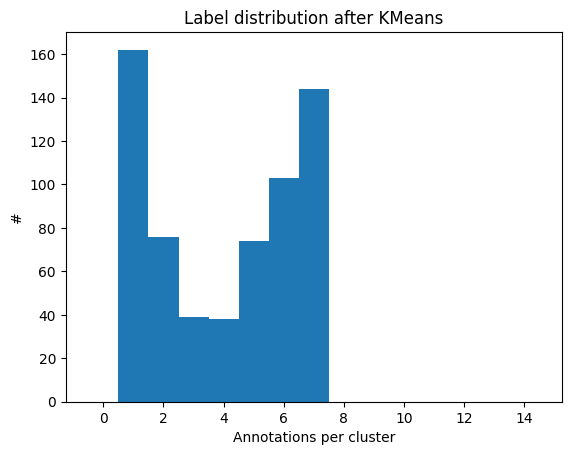

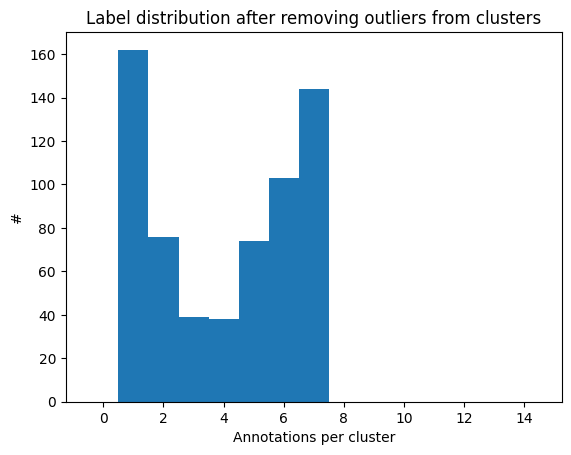

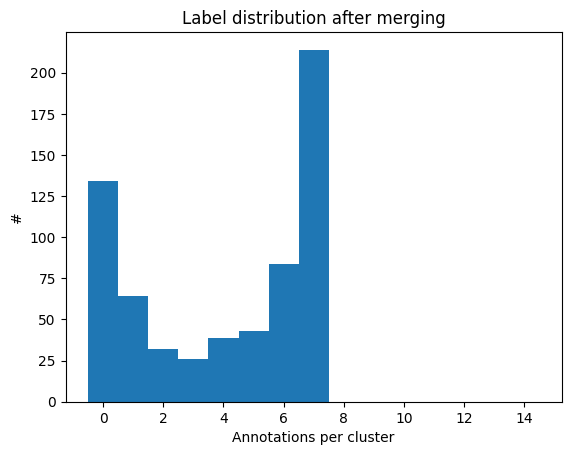

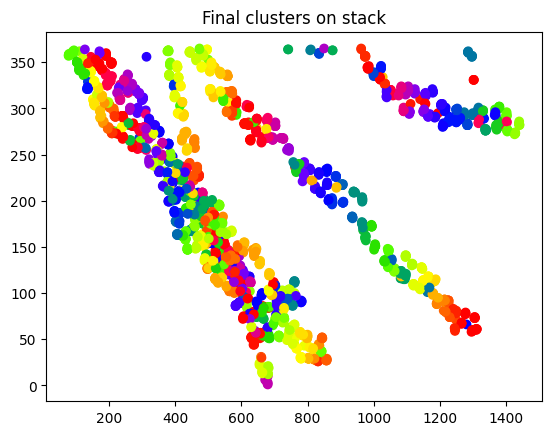

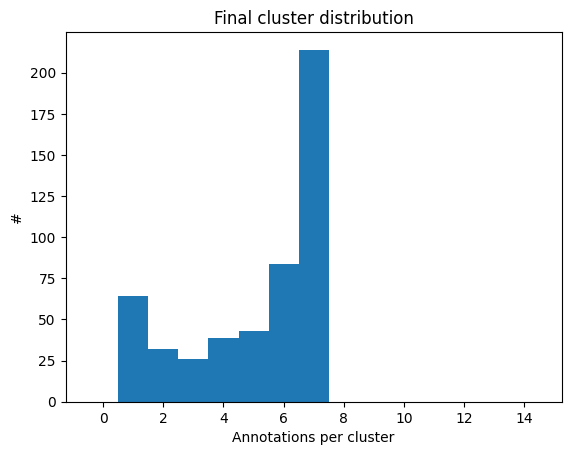

In [17]:
# Define a function for cleaning up initial clusters
def cleanClusterZ(xyz, labels, n_labels, max_dxy=0.85, max_dz=2.5, res_xy=0.094, res_z=0.5, verbose=True):
    """
        Splitting, cleaning and merging initial clusters.

        xyz (numpy.ndarray): X, Y and Z location of each annotation
        labels (numpy.ndarray): initial labels
        n_labels (int): amount of initially found clusters
        max_dxy (float): maximum distance to cluster center in x and y, in microns, defaults to 0.85
        max_dz (float): maximum distance to cluster center in z, in microns, defaults to 2.5
        res_xy (float): resolution in x and y, in microns, defaults to 0.094
        res_z (float): resolution in z, in microns, defaults to 0.5
        verbose (bool): prints intermediate information to console, defaults to True

    """
    # First Go - split big clusters
    new_labels = labels.copy()

    cur_label = n_labels+1


   # Perform cluster splitting 3 times

    for _ in range(3):
        # Iterate over each cluster and split ones that have more than 7 ratings
        for i in tqdm(range(cur_label-1)):
            N_ = np.sum(new_labels==i)

            # If there are more than 7 elements in the cluster, split it
            if N_ > 7:
                # KMeans clustering to find 2 subclusters
                km = KMeans(2)
                km.fit(xyz[new_labels==i])

                # Determine if this is not possible
                if km.labels_.sum() == 0:
                    if verbose:
                        print("KMeans no two clusters: ", km.labels_)

                # Select the ones deemed as "cluster 1"
                selection = np.zeros_like(new_labels==i)

                for kmi in range(km.labels_.size):
                    if km.labels_[kmi] == 1:
                        selection[np.argwhere(new_labels==i).flatten()[kmi]] = True

                # Assign those a new cluster ID
                new_labels[selection] = cur_label

                if verbose:
                    print("before:", N_, "after:", np.sum(new_labels==i))
                cur_label += 1

    #######################################
    if verbose:
        print("Labels after k-means split")

    # Histogram of clusters after splitting
    r = countlabels(new_labels, max(new_labels))
    plt.figure()
    plt.hist(r, bins=np.arange(16)-0.5)
    plt.xlabel("Annotations per cluster")
    plt.ylabel("#")
    plt.title("Label distribution after KMeans")
    #######################################

    # Second round - Remove elements that are far from the cluster center
    for i in range(cur_label-1):
        cx, cy, cz = np.median(xyz[new_labels==i], 0)

         # Remove elements if they are too far from the cluster center
        for ix in range(xyz[new_labels==i].shape[0]):
            e = xyz[new_labels==i][ix]

            ## Euclidean distance in xy and in z
            dxy = ((cx-e[0])**2 + (cy-e[1])**2)**0.5 * res_xy
            dz = ((cz-e[2])**2)**0.5 * res_z

            ## If exceeded, remove from original cluster and assign new cluster label
            if dxy > max_dxy or dz > max_dz:
                new_labels[new_labels==i][ix] = cur_label
                cur_label += 1

                if verbose:
                    print(f"Removed from cluster... cluster {i}, idx {ix}, dxy {dxy:.2f}, dz {dz:.2f}")

   # Histogram of clusters after removing outliers
    r = countlabels(new_labels, max(new_labels))
    plt.figure()
    plt.hist(r, bins=np.arange(16)-0.5)
    plt.xlabel("Annotations per cluster")
    plt.ylabel("#")
    plt.title("Label distribution after removing outliers from clusters")

    # Third round - Merge clusters
    labels = new_labels.copy()
    n_labels = max(labels)
    cur_label = n_labels+1

    # For all clusters >= 3, find adjacent single labels
    for cluster_size in range(6,1,-1):

        for i in range(n_labels):
            N_ = np.sum(labels==i)

            if verbose:
                if N_ > 7:
                    print("cluster too large!", i, N_)

            # Look only at clusters of that given size
            if N_ == cluster_size:
                cx, cy, cz = np.median(xyz[labels==i], 0)

                cur_cluster_size = cluster_size + 0.
                # Attempt to merge clusters if it's possible
                for j in range(n_labels):
                    Nj_ = np.sum(labels==j)

                    # Try to merge with clusters
                    # to gain clusters of 7 if possible
                    if Nj_ <= 7-cluster_size and cur_cluster_size < 7:

                        # For each potential merging candidate,
                        # check distance
                        merged = 0

                        for ix in range(xyz[labels==j].shape[0]):
                            e = xyz[labels==j][ix-merged]

                            dxy = np.sqrt((cx-e[0])**2 + (cy-e[1])**2) * res_xy
                            dz = np.sqrt((cz-e[2])**2) * res_z

                            if dxy <= max_dxy and dz <= max_dz and cur_cluster_size < 7:
                                selection = np.zeros_like(labels==j)

                                if verbose:
                                    print(np.argwhere(labels==j), ix, merged)
                                selection[np.argwhere(labels==j).flatten()[ix-merged]] = True
                                labels[selection] = i

                                ## Keep track of cluster size and how many have been merged
                                cur_cluster_size += 1
                                merged += 1

                                if verbose:
                                    print(f"Merged point {j} ({e}) with cluster {i}")



    # Histogram of clusters after merging
    r = countlabels(labels, max(labels))
    plt.figure()
    plt.hist(r, bins=np.arange(16)-0.5)
    plt.xlabel("Annotations per cluster")
    plt.ylabel("#")
    plt.title("Label distribution after merging")

    return labels
human_df['X'] = human_df['X'].astype(float)
human_df['Y'] = human_df['Y'].astype(float)
human_df['Pos'] = human_df['Pos'].astype(float)

# Apply the cleaning function
l_clean = cleanClusterZ(human_df[['X','Y','Pos']].values, l, max_l)
plt.figure()
plt.scatter(human_df['X'], human_df['Y'], c=l_clean, cmap=cm.prism)
plt.title("Final clusters on stack")

# Histogram of final clusters
max_l = max(set(l_clean))
r = countlabels(l_clean, max_l)
r = r[r!=0]

plt.figure()
plt.hist(r, bins=np.arange(16)-0.5)
plt.xlabel("Annotations per cluster")
plt.ylabel("#")
plt.title("Final cluster distribution")

# Relabel the clusters to ensure continuous label ids
@njit
def reid(labels):
    """Relabel an existing label map to ensure continuous label ids

    Args:
        labels (numpy.ndarray): original label map

    Returns:
        numpy.ndarray: re-computed label map
    """
    ls = np.unique(labels)

    new_labels = np.zeros(labels.shape, dtype=np.int32)

    for i in range(labels.shape[0]):
        l = labels[i]
        new_labels[i] = np.argmax(ls==l)

    return new_labels

# Apply relabeling and save to file
l_clean_continuous = reid(l_clean)
human_df['label'] = l_clean_continuous

human_df.to_csv("final_clusters.csv")



In [19]:
# Calculate Recall and Precision
tp = 0
fp = 0
fn = 0
roi_df = pd.DataFrame(roi_data)
roi_df['X'] = pd.to_numeric(roi_df['X'], errors='coerce')
roi_df['Y'] = pd.to_numeric(roi_df['Y'], errors='coerce')
roi_df['Pos'] = pd.to_numeric(roi_df['Pos'], errors='coerce')

for index, roi_row in roi_df.iterrows():
    # roi_id = roi_row['ROI_id']
    centroid = (float(roi_row['X']), float(roi_row['Y']), float(roi_row['Pos']))

    matched = False
    for human_row in human_data:
        label = human_row['label']
        human_pos = (float(human_row['X']), float(human_row['Y']), float(human_row['Pos']))

        # Compare the centroid values with the human annotated data using a distance threshold
        if euclidean_distance(centroid, human_pos) < threshold:
            matched = True
            break

    if matched:
        tp += 1

    else:
        fp += 1


# Count the false negatives by subtracting the matched true positives from the total number of human annotations
fn = len(human_data) - tp
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Recall:", recall)
print("Precision:", precision)

f1_score = 2 * (precision * recall) / (precision + recall)
print("F1 Score:", f1_score)

Recall: 0.813710302091402
Precision: 0.9446942446043165
F1 Score: 0.8743237619642115
